Tarea 5 proyecto de analisis de datos

Jose Miguel Cruz Segura ##202016908_84

Fusagasuga 2024

In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_titanic = pd.read_csv('C:/Users/ASUS-PC/OneDrive/Documentos/fase5/ANÁLISIS_DE_DATOS/Anexo6_Dataset_Titanic/Titanic_Dataset.csv')

In [4]:
print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df_titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


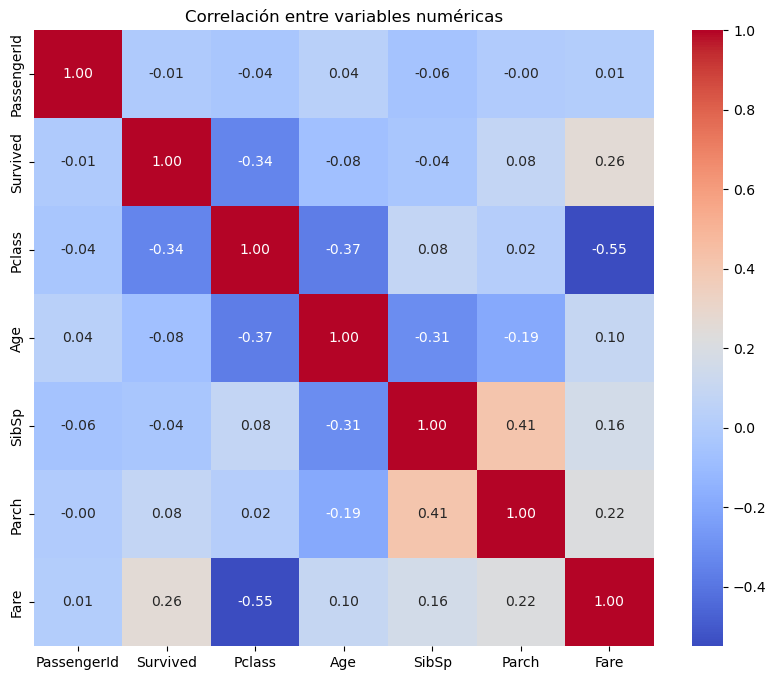

In [7]:
# Seleccionar solo columnas numéricas
df_titanic_numeric = df_titanic.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_titanic_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()


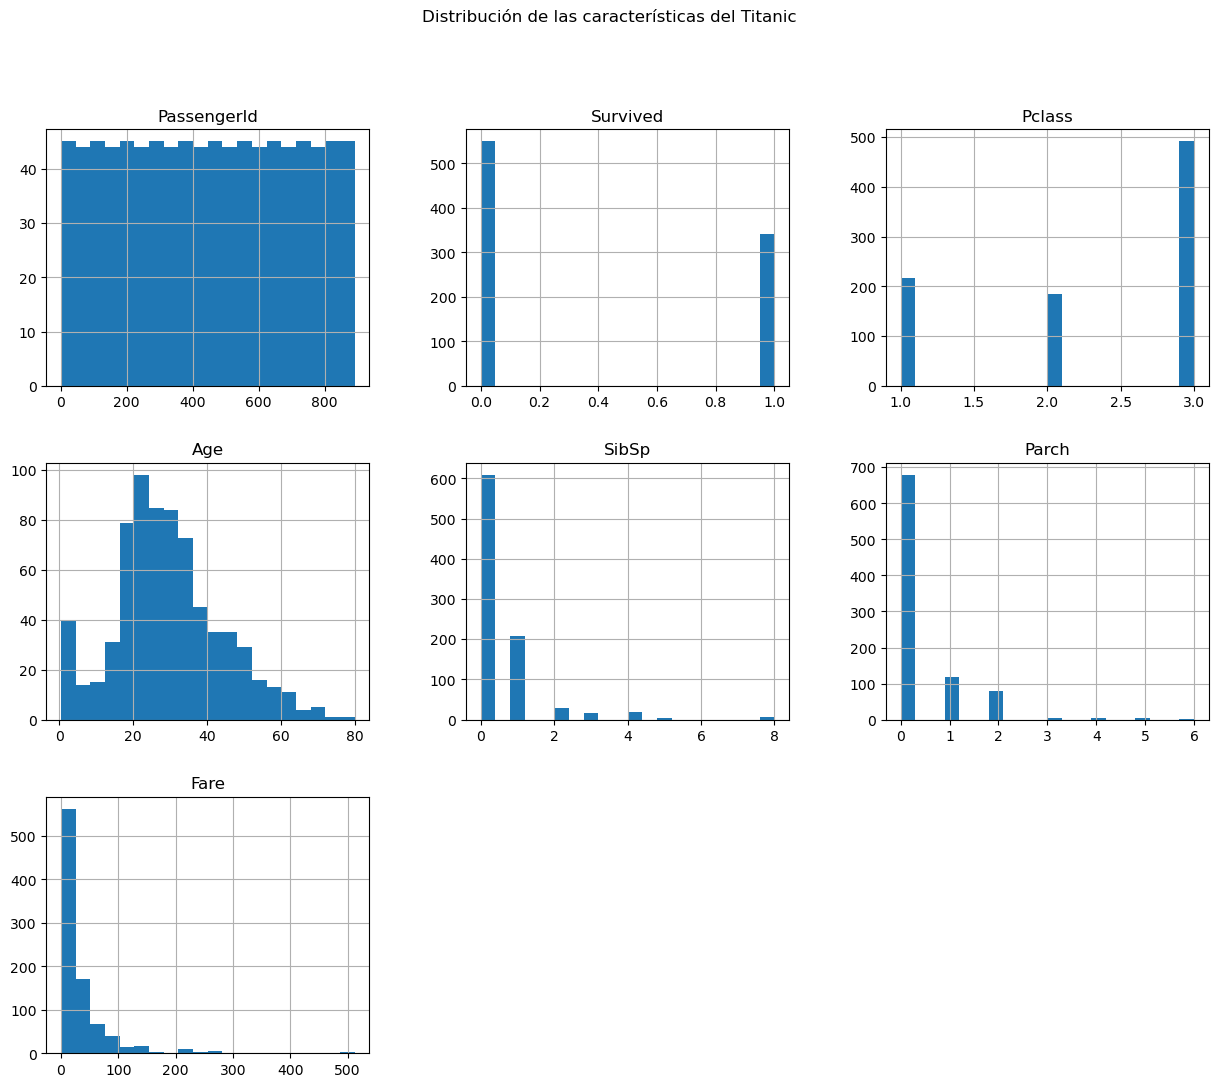

In [8]:
df_titanic.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribución de las características del Titanic')
plt.show()

Paso 2: Preprocesamiento de los datos

In [9]:
print(df_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# Imputar los valores faltantes, por ejemplo, con la media para la edad
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

In [15]:
# Imputar los valores faltantes en la columna 'Embarked' con el valor más frecuente
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [16]:
# Convertir las variables categóricas a numéricas (por ejemplo, 'Sex' y 'Embarked')
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], drop_first=True)

In [17]:
# Normalizar las características numéricas (si es necesario)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
# Seleccionamos solo las columnas numéricas
features = df_titanic.select_dtypes(include=['float64', 'int64']).drop('Survived', axis=1)

# Aplicamos la normalización
scaled_features = scaler.fit_transform(features)


In [22]:
print(df_titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [23]:
df_titanic.columns = df_titanic.columns.str.strip()  # Eliminar espacios extra

In [28]:
# Imputar los valores faltantes en 'Embarked' con el valor más frecuente
df_titanic['Embarked_Q'].fillna(df_titanic['Embarked_S'].mode()[0], inplace=True)

In [30]:
# Convertir las variables categóricas 'Sex' y 'Embarked' a variables numéricas
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked_Q'], drop_first=True)

In [31]:
# Normalizar las características numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Reemplazar las características originales por las normalizadas
df_titanic_scaled = pd.DataFrame(scaled_features, columns=features.columns)


In [11]:
features = df_titanic.drop('Survived', axis=1)

In [13]:
scaled_features = scaler.fit_transform(features)

NameError: name 'scaler' is not defined